In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [73]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv('car_data.csv')

In [75]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [77]:
df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis = 1, inplace = True)

In [78]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [79]:
df.columns = ['Make', 'Model', 'Year', 'Hp', 'Cylinders', 'Transmission', 'Drive_Mode', 'MPG_H', 'MPG_C', 'Price']

In [80]:
df.head()

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [81]:
df[df.duplicated()]

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,29149


# QUESTIONS
## QUEST 1
#### Remove duplicates

In [82]:
df = df.drop_duplicates()

In [83]:
df[df.duplicated()]

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price


In [84]:
df

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


## Quest 2
#### Identify the categorical and the numerical features in the dataset

In [85]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Make', 'Model', 'Transmission', 'Drive_Mode']
Numerical features: ['Year', 'Hp', 'Cylinders', 'MPG_H', 'MPG_C', 'Price']


## Quest 3
#### Identify the columns which have missing values and impute them accordingly.

In [86]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()


for column in columns_with_missing_values:
    if df[column].dtype == 'object':
        df[column].fillna('Unknown', inplace=True)  
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [87]:
print("Columns with missing values:", columns_with_missing_values)
print("Imputed DataFrame:")
print(df)

Columns with missing values: ['Hp', 'Cylinders']
Imputed DataFrame:
          Make       Model  Year     Hp  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive_Mode  MPG_H  MPG_C  Price  
0       rear wheel drive     26     19  46135  
1       rear wheel drive     28

## Quest 4
#### Identify the outliers in the price column using IQR technique and create a column called is_outlier to clearly flag the outliers without dropping them from the dataset.

In [88]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df['is_outlier'] = ((df['Price'] < lower_bound) | (df['Price'] > upper_bound))

print(df)

          Make       Model  Year     Hp  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive_Mode  MPG_H  MPG_C  Price  is_outlier  
0       rear wheel drive     26     19  46135       False  
1       rear wheel drive     28     19  40650       False  
2       rear wh

## Quet 5
#### Standardize the numerical columns either using Min-Max or Standard scaling method.

In [89]:
from sklearn.preprocessing import StandardScaler
numerical_columns =['Year', 'Hp', 'Cylinders', 'MPG_H', 'MPG_C', 'Price']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [90]:
print(df)

          Make       Model      Year        Hp  Cylinders Transmission  \
0          BMW  1 Series M  0.011703  0.736622   0.184652       MANUAL   
1          BMW    1 Series  0.011703  0.416751   0.184652       MANUAL   
2          BMW    1 Series  0.011703  0.416751   0.184652       MANUAL   
3          BMW    1 Series  0.011703 -0.222991   0.184652       MANUAL   
4          BMW    1 Series  0.011703 -0.222991   0.184652       MANUAL   
...        ...         ...       ...       ...        ...          ...   
11909    Acura         ZDX  0.154239  0.416751   0.184652    AUTOMATIC   
11910    Acura         ZDX  0.154239  0.416751   0.184652    AUTOMATIC   
11911    Acura         ZDX  0.154239  0.416751   0.184652    AUTOMATIC   
11912    Acura         ZDX  0.296775  0.416751   0.184652    AUTOMATIC   
11913  Lincoln      Zephyr -0.700976 -0.305244   0.184652    AUTOMATIC   

              Drive_Mode     MPG_H     MPG_C     Price  is_outlier  
0       rear wheel drive -0.072501 -0.0832

## Quest 6
### Plot histogram of Car make with its frequency

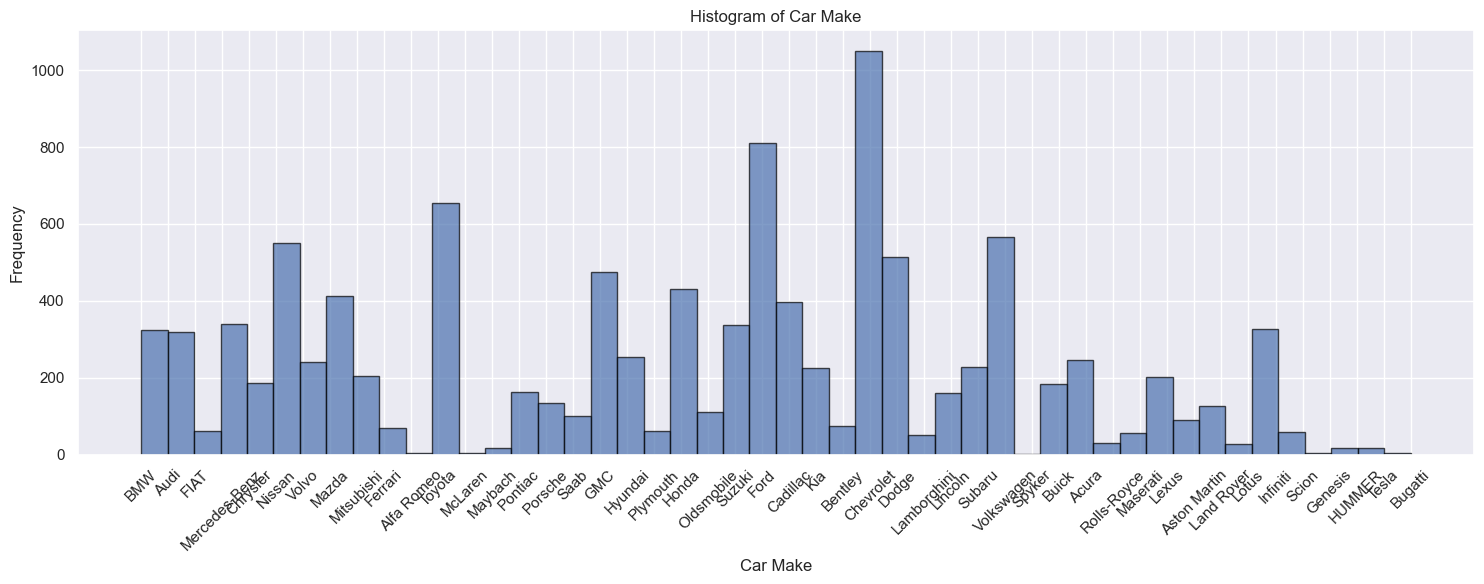

In [91]:
car_make_counts = df['Make'].value_counts()
plt.figure(figsize=(15, 6))
plt.hist(df['Make'], bins=len(car_make_counts), edgecolor='black', alpha=0.7)
plt.title('Histogram of Car Make')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Heat Maps is a type of plot which is necessary when we need to find the dependent variables.
## Quest 7 
#### Create a heat map of all numerical columns

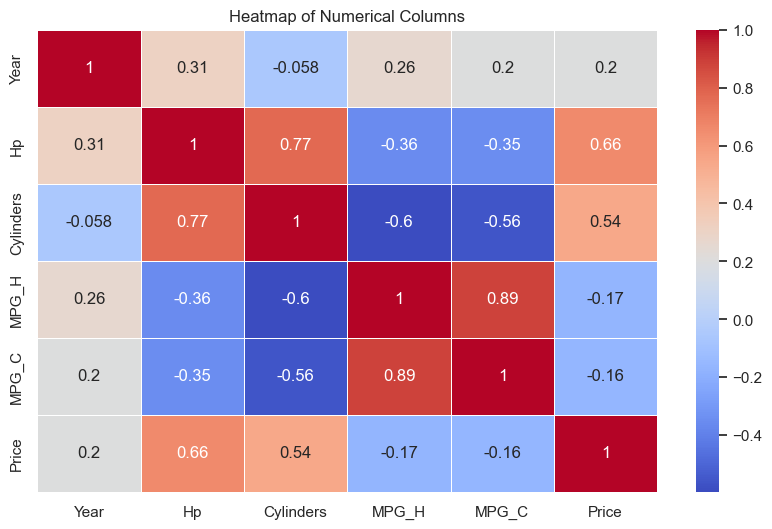

In [92]:
numerical_columns = df.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Columns')
plt.show()


#### Scatterplot : We generally use scatter plots to find the correlation between two variables
## Quest 8
#### Create scatterplot between HP and Price

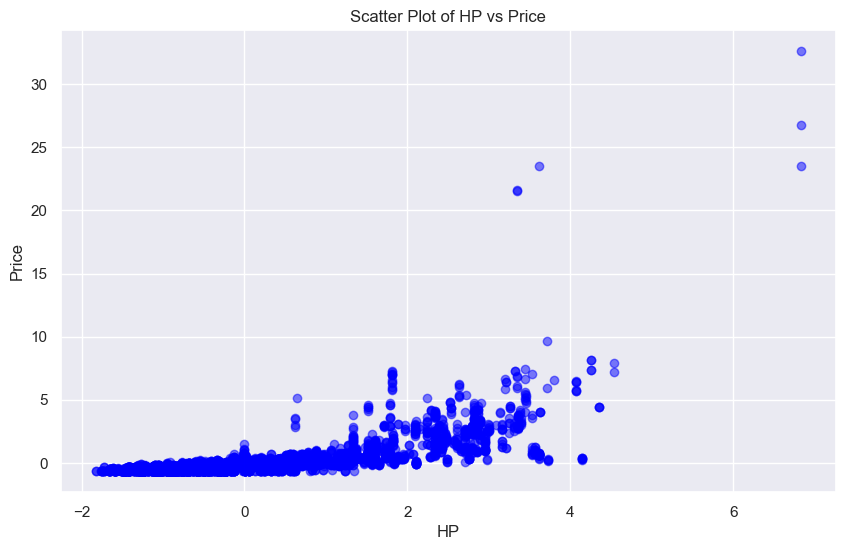

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hp'], df['Price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of HP vs Price')
plt.xlabel('HP')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Quest 6
#### Create new features by transforming the following columns -

#### #	Feature	Transformation	Feature type
#### 1.	price	Log	Numerical
#### 2.	city_mpg	BoxCox	Numerical
#### 3.	make	One-hot encoding	Categorical


In [95]:
from sklearn.preprocessing import PowerTransformer, OneHotEncoder

In [96]:
df['price_log'] = np.log(df['Price'])


In [97]:
df['MPG_C_pos'] = df['MPG_C'] + abs(df['MPG_C'].min()) + 1

In [ ]:
boxcox = PowerTransformer(method='box-cox')
df['city_mpg_boxcox'] = boxcox.fit_transform(df['MPG_C_pos'].values.reshape(-1, 1)

In [98]:
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
make_encoded = one_hot_encoder.fit_transform(df[['Make']])
make_encoded_df = pd.DataFrame(make_encoded, columns=one_hot_encoder.categories_[0][1:])
df = pd.concat([df, make_encoded_df], axis=1)

In [99]:
df.drop(['Price', 'MPG_C', 'Make', 'MPG_C_pos'], axis=1, inplace=True)

In [101]:
df.head()

,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,is_outlier,price_log,Alfa Romeo,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
0,1 Series M,0.011703,0.736622,0.184652,MANUAL,rear wheel drive,-0.072501,False,-2.836406,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1 Series,0.011703,0.416751,0.184652,MANUAL,rear wheel drive,0.148966,False,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1 Series,0.011703,0.416751,0.184652,MANUAL,rear wheel drive,0.148966,False,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1 Series,0.011703,-0.222991,0.184652,MANUAL,rear wheel drive,0.148966,False,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1 Series,0.011703,-0.222991,0.184652,MANUAL,rear wheel drive,0.148966,False,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
